# Popular Data Science Questions

What are the questions people have about data science that need answering? Let's find out by looking at data from the [Data Science Stack Exchange](https://datascience.stackexchange.com/)!

## Stack Exchange Data Explorer

Rather than webscraping data from Stack Exchange, we can use their built in [query tool](https://data.stackexchange.com/datascience/query/new) to find which tables contain data that might be relevent to us. Some that are worth exploring include:
 - Posts
 - Tags
 - PostTags

Posts on Stack Exchange can be most easily categorized by their tags. Each post will have tags that users have entered to define what broad category the post is about. Taking a look at what information is available in the above tables, the Posts table includes the most relevant information for the analysis. Namely:
 - ID: A post identification number
 - PostTypeId: A post type identification number
 - CreationDate: The date and time the post was created
 - Score: The overall users' score of the post
 - ViewCount: How many times the post was viewed
 - Tags: What tags were included for the post
 - AnswerCount: How many answers the post has (if applicable)
 - FavoriteCount: How many times the post was favored (if applicable)

## Getting Data

We can get this data by running this query:

```
SELECT 
  Id,
  CreationDate, 
  Score, 
  ViewCount, 
  Tags, 
  AnswerCount, 
  FavoriteCount
FROM posts
WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
```

Note the PostTypeId = 1 is gathering only Question-type posts.

The data from this query is saved as `2019_questions.csv`

## Exploring Data

Let's import all the libraries we will need and see what metadata exists about this database.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])

questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


From the .info() method alone, we can tell a few things about this data.
- There is only missing data in the `Favorite Count` column, most likely meaning it was never 'favorited' so the values could be replaced with zero.
- The column datatypes seem mostly sufficient, FavoriteCount probably doesn't need to be a float64 datatype but that can easily be changed.
- The Tags column is likely text but will require further exploration.

In [3]:
questions['Tags'].head()
print(questions['Tags'].apply(lambda x: type(x)).unique())

[<class 'str'>]


The Tags column looks like it is a list of tags that are in a string format. These could be split into separate columns but it wouldn't be very useful to for finding what how tags correlate between questions.

## Cleaning Data

Let's add missing data to the `FavoriteCount` column first.

In [4]:
questions.fillna(value={'FavoriteCount': 0} , inplace=True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


Now for the `Tags` column. We can make this list-like string a bit easier to work with.

In [5]:
questions['Tags'] = questions['Tags'].str.replace("^<|>$", "").str.split('><')
questions['Tags']

0                         [machine-learning, data-mining]
1       [machine-learning, regression, linear-regressi...
2            [python, time-series, forecast, forecasting]
3                   [machine-learning, scikit-learn, pca]
4                [dataset, bigdata, data, speech-to-text]
5                                           [fuzzy-logic]
6       [time-series, anomaly-detection, online-learning]
7                                  [matrix-factorisation]
8                   [correlation, naive-bayes-classifier]
9       [machine-learning, python, deep-learning, kera...
10                                     [machine-learning]
11                             [machine-learning, theory]
12                   [machine-learning, gradient-descent]
13      [nlp, clustering, feature-extraction, encoding...
14                  [python, scikit-learn, pandas, numpy]
15      [python, scikit-learn, decision-trees, accurac...
16                                       [python, pandas]
17            

## Most Used and Most Viewed Tags

Let's count how many times each tag was used and viewed, starting with uses.

#### Most Uses

In [6]:
tag_count = {}

for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0: 'Count'}, inplace=True)
most_used = tag_count.sort_values('Count', ascending=False)
most_used

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


#### Most Uses Visualized

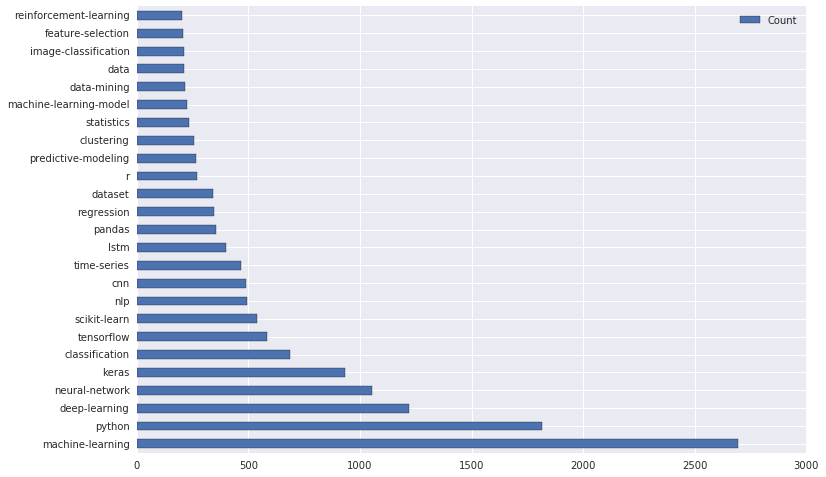

In [7]:
most_used.iloc[0:25, :].plot(kind='barh', figsize=(12,8))

The choice to visualize the top 25 Tags is a bit random, but the count of Tags do fall off quite steadily after the first 15 or so Tags.

#### Most Views

In [8]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient='index')
tag_view_count.rename(columns={0: 'ViewCount'}, inplace=True)

most_viewed = tag_view_count.sort_values('ViewCount', ascending=False)
most_viewed


,ViewCount
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


#### Most Viewed Tags, Visualized

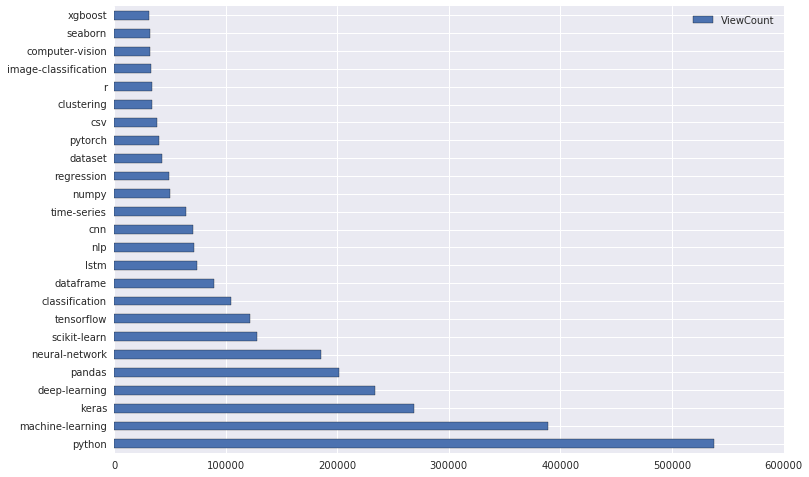

In [9]:
most_viewed.iloc[0:25, :].plot(kind='barh', figsize=(12,8))

There is a decent overlabe between Tags used and viewed. Not surprisingly there are many more views overall than uses. It is likely these views are what people search for when they need help finding information on the topic rather than posting their knowledge.

## Relations Between Tags

Looking at the previous graphs, we can see a lot of tags in the top 25 belong to both most used and most viewed. Let's explore these a bit to see how these are related.

#### Most Used Tags Doesn't Mean Most Viewed Tags

In [19]:
views_in_used = pd.merge(most_used, most_viewed, how='left', left_index=True, right_index=True)
views_in_used.head(10)

,Count,ViewCount
machine-learning,2693,388499
python,1814,537585
deep-learning,1220,233628
neural-network,1055,185367
keras,935,268608
classification,685,104457
tensorflow,584,121369
scikit-learn,540,128110
nlp,493,71382
cnn,489,70349


In [18]:
used_in_views = pd.merge(most_used, most_viewed, how='right', left_index=True, right_index=True)
used_in_views.head(10)

,Count,ViewCount
python,1814,537585
machine-learning,2693,388499
keras,935,268608
deep-learning,1220,233628
pandas,354,201787
neural-network,1055,185367
scikit-learn,540,128110
tensorflow,584,121369
classification,685,104457
dataframe,81,89352


Let's create a list of all tags together and make an empty data frame.

In [25]:
all_tags = list(tag_count.index)

associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.fillna(0, inplace=True)
associations.iloc[0:5, 0:5]

,linux,regularization,mse,distributed,probability
linux,0,0,0,0,0
regularization,0,0,0,0,0
mse,0,0,0,0,0
distributed,0,0,0,0,0
probability,0,0,0,0,0


Now fill it with how many times each pair of tags was used together.

In [28]:
for tags in questions['Tags']:
    associations.loc[tags, tags] += 1
    
associations.iloc[0:5, 0:5]

,linux,regularization,mse,distributed,probability
linux,15,0,0,0,0
regularization,0,150,0,0,0
mse,0,0,24,0,0
distributed,0,0,0,21,0
probability,0,0,0,0,228


In [43]:
relations_most_used = associations.loc[most_used.head(25).index, most_used.head(25).index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model,data-mining,data,image-classification,feature-selection,reinforcement-learning
machine-learning,8079,1497,1287,1098,585,777,318,564,339,372,393,213,186,357,297,189,369,183,267,417,285,162,204,264,150
python,1497,5442,480,411,840,294,501,705,213,186,315,183,732,177,159,72,105,135,105,111,81,105,72,78,51
deep-learning,1287,480,3660,915,741,177,408,48,216,480,132,309,3,63,96,15,96,6,36,57,72,6,198,63,162
neural-network,1098,411,915,3165,705,195,324,72,72,354,99,207,3,126,60,27,39,24,33,30,12,12,147,27,75
keras,585,840,741,705,2805,174,768,102,69,348,153,399,9,93,39,30,33,0,9,51,3,3,138,9,24
classification,777,294,177,195,174,2055,60,141,105,60,75,60,9,102,84,30,81,36,57,63,57,27,48,63,0
tensorflow,318,501,408,324,768,60,1752,45,33,171,27,129,9,27,27,3,18,0,0,27,0,0,45,0,30
scikit-learn,564,705,48,72,102,141,45,1620,36,0,36,6,111,111,27,3,36,72,18,54,6,12,3,69,0
nlp,339,213,216,72,69,105,33,36,1479,21,0,57,9,6,33,12,3,27,9,12,24,15,0,15,12
cnn,372,186,480,354,348,60,171,0,21,1467,24,72,3,18,33,6,18,0,3,12,6,3,201,3,6


This dataframe is very large and hard to interpret. Why not use a heatmap.

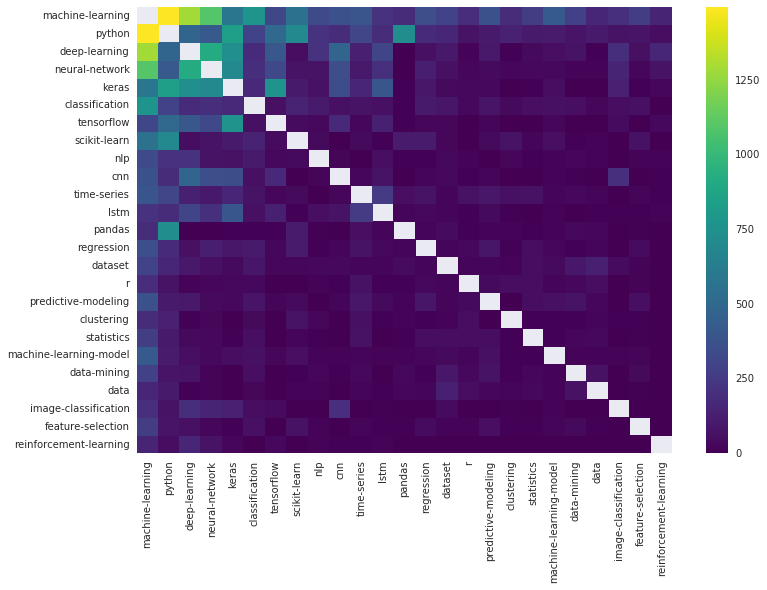

In [45]:
#Mask values on the diagonal to keep them from skewing heatmap.
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

plt.figure(figsize=(12, 8))
sns.heatmap(relations_most_used, cmap='viridis', annot=False)

The most used tags definitely have some of the strongest relationships. This is seen by the brighter colors in the top left of the heatmap. Although this analysis is a good first view, correlation of common tags is not necessarily causation for their use. As always, further exploration is needed!